##Цель проекта

Цель нашего проекта - разведочный анализ данных с визуализацией и построение предсказательной модели среднего рейтинга книги. Дата на котором мы будем делать анализ взят из (https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks). Это список книг из портала Goodreads.

В ходе разведочного анализы мы определим:
1. Количество книг на разных языках
2. Распределение количества соавторов
3. Топ 10 книг с наибольшим количеством оценок
4. Топ 10 книг с наибольшим количеством отзывов
5. Топ 20 книг с самым высоким средним рейтингом
6. Книги с самым низким средним рейтингом
7. Топ 10 авторов с высоким рейтингом

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/books.csv',  on_bad_lines='skip')
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


#Подготовка данных

Посмотрим на типы данных в колонках

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


Есть ли в датасете пропуски?

In [3]:
df.isna().any()

bookID                False
title                 False
authors               False
average_rating        False
isbn                  False
isbn13                False
language_code         False
  num_pages           False
ratings_count         False
text_reviews_count    False
publication_date      False
publisher             False
dtype: bool

Пропусков нет)

In [4]:
#проверим есть ли дубликаты
df.duplicated().any()

False

In [5]:
#удалим колонки, которые нам не понадобятся
df.drop(['bookID','isbn','isbn13'],axis = 1,inplace=True)

In [6]:
#в названии колонки есть пробелы, изменим его
df=df.rename(columns={"  num_pages": 'num_pages'})

#Разведочный анализ

##Посмотрим книг на каком языке больше всего

In [7]:
l_code=df.groupby('language_code')['title'].count().sort_values(ascending=False).head(10)
l_code

language_code
eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
Name: title, dtype: int64

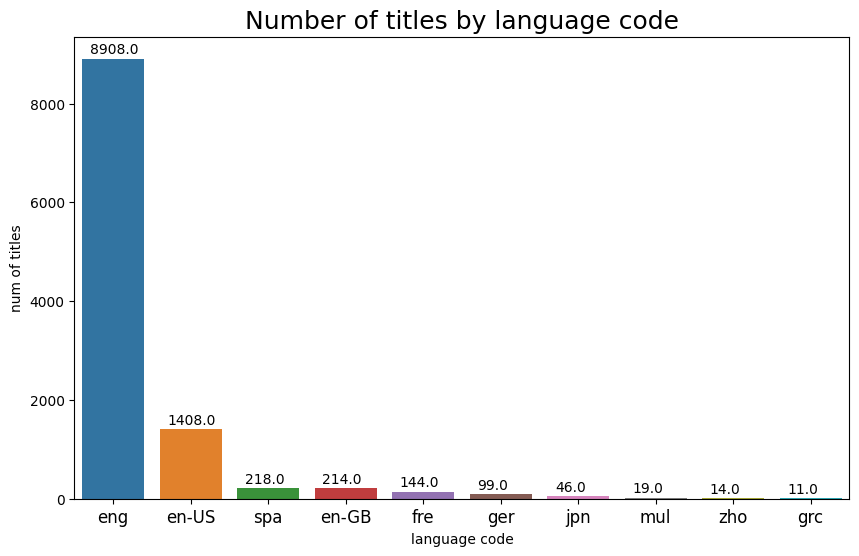

In [8]:
#построим столбчатую диаграмму и выведем значения
plt.figure(figsize = (10, 6))
ax = sns.barplot (y = l_code, x = l_code.index)
plt.title('Number of titles by language code',fontsize=18)
plt.xticks(fontsize=12)
plt.ylabel('num of titles')
plt.xlabel('language code')
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()+0.1,p.get_height()+100))

Больше всего книг на английском языке (на диаграмме их три)

In [9]:
#сосредоточимся на книгах на английском языке
df = df[(df.language_code =='eng')|(df.language_code =='eng-US')|(df.language_code =='eng-GB')]

In [10]:
#считаем количество соавторов и сгруппируем их по количеству книг
df['co-authors'] = df['authors'].apply(lambda x: x.count('/'))
#оставим первые восемь значений
co_authors_sorted=df.groupby('co-authors')['title'].count().sort_values(ascending = False).head(8)

<ipython-input-10-eafbd804d91a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['co-authors'] = df['authors'].apply(lambda x: x.count('/'))


##Книг с каким количеством соавторов больше?

<ipython-input-11-b4f1ed454657>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['co-authors'] = df['authors'].apply(lambda x: x.count('/'))


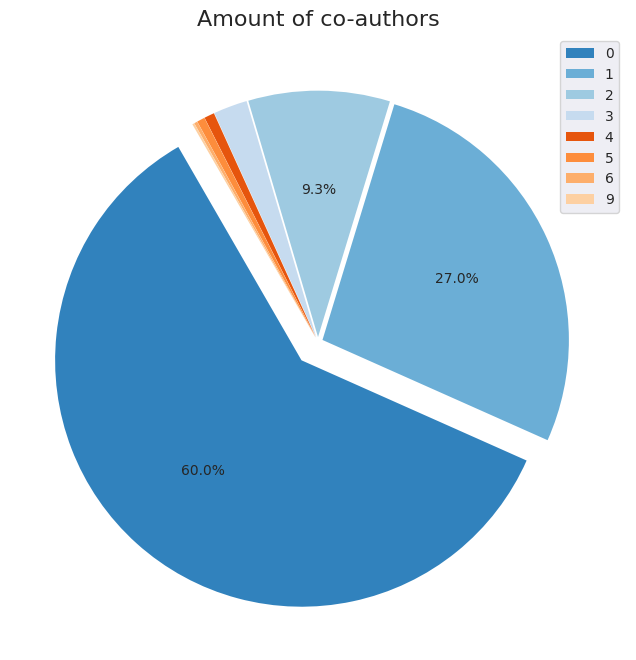

In [11]:
#выведем количество соавторов и сгруппируем по количеству книг
df['co-authors'] = df['authors'].apply(lambda x: x.count('/'))
co_authors_sorted=df.groupby('co-authors')['title'].count().sort_values(ascending = False).head(8)

# сделаем круговую диаграмму
data = co_authors_sorted.values
labels = co_authors_sorted.index

sns.set_style("darkgrid")
sns.set_palette("tab20c")
explode = [0.1 if i==0 else 0.02 for i in range(len(data))]

plt.figure(figsize = (9, 8))
plt.pie(data,
        labels=None,
        autopct = lambda p: f'{p:.1f}%' if p >= 3 else '',
        explode = explode,
        startangle = 120,
        wedgeprops=dict(edgecolor="k", linewidth=0))

plt.legend(labels, loc='upper right')
plt.title('Amount of co-authors', fontsize = 16)
plt.show()


Как мы видим из нашей круговой диаграммы больше половины книг имеют лишь одного автора и примерно 30% - двух. Доля книг с большим количеством соавторов уменьшается по мере увеличения числа соавторов.

##Топ книгс самым большим количеством оценок

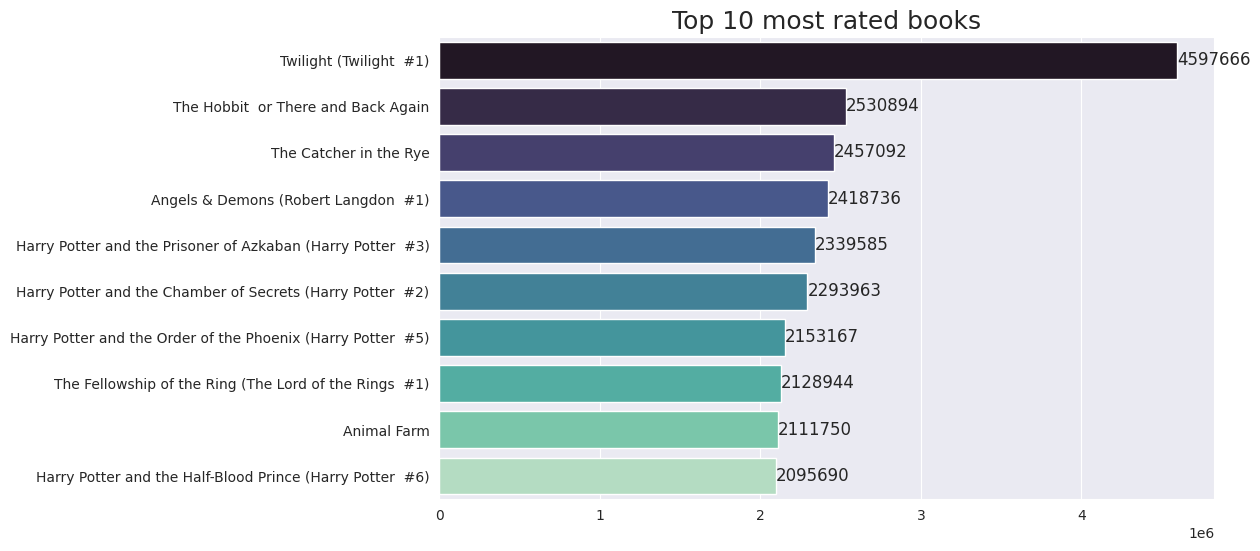

In [12]:
top_rated = df.sort_values('ratings_count',ascending=False).head(10).set_index('title')
#сделаем столбчатую диаграмму со значения
colors = sns.color_palette('mako', n_colors=len(top_rated))
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(y=top_rated.index, x=top_rated['ratings_count'], ax=ax, palette = colors)

ax.set_ylabel('')
ax.set_xlabel('')
plt.title("Top 10 most rated books", fontsize=18)
#выведем количество у каждого столбца
for i in ax.patches:
    ax.text(i.get_width()+3, i.get_y()+.5, str(round(i.get_width())), fontsize=12)

plt.show()

Как мы видим книгу "Сумерки" (первая часть) оценивали больше всего. Отрыв от второй позиции почти в два раза. Можно смело утверждать что самая популярная книга на сервисе. Следом идет Хоббит, или Туда и обратно Д.Р.Р. Толкиена и популярная среди подростков "Над пропастью во ржи". Также большой популярностьб пользуются части серии романов о Гарри Поттере.

##Топ книг с самым большим количеством рецензий

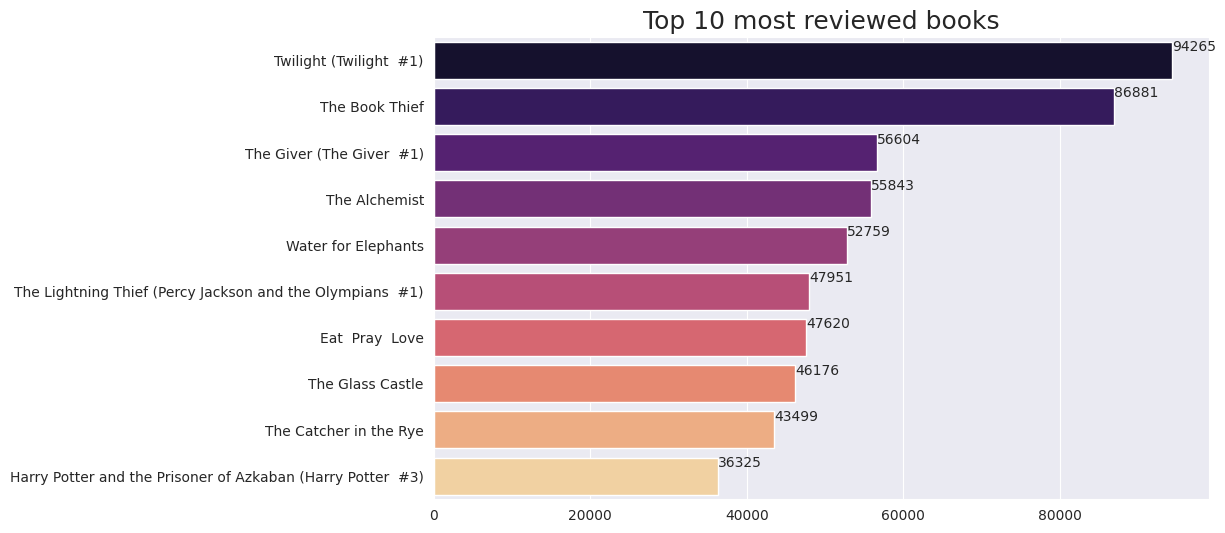

In [13]:
top_reviews = df.sort_values('text_reviews_count',ascending=False).head(10).set_index('title')

colors = sns.color_palette('magma', n_colors=len(top_reviews))
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(y=top_reviews.index, x=top_reviews['text_reviews_count'], ax=ax, palette = colors)

ax.set_ylabel('')
ax.set_xlabel('')
plt.title("Top 10 most reviewed books", fontsize=18)

for i in ax.patches:
    ax.text(i.get_width()+3, i.get_y()+.2,str(round(i.get_width())), fontsize=10)
plt.show()

Больше всего рецензии все также написано на "Сумерки". Второй идет книга "Книжный вор". Возможно рецензентов глубоко тронул сюжет книги. Далее идут "Дающий" - антиутопия, входящая в школьную программу США, Канады и Австралии и манга "Стальной алхимик".

##Топ самых высоко оцененных книг

In [14]:
#выберем первые двадцать пять с условием больше тысячи оценок
top_rating = df[df['ratings_count'] > 1000]
top_rating = top_rating.sort_values('average_rating', ascending=False).head(20).set_index('title')

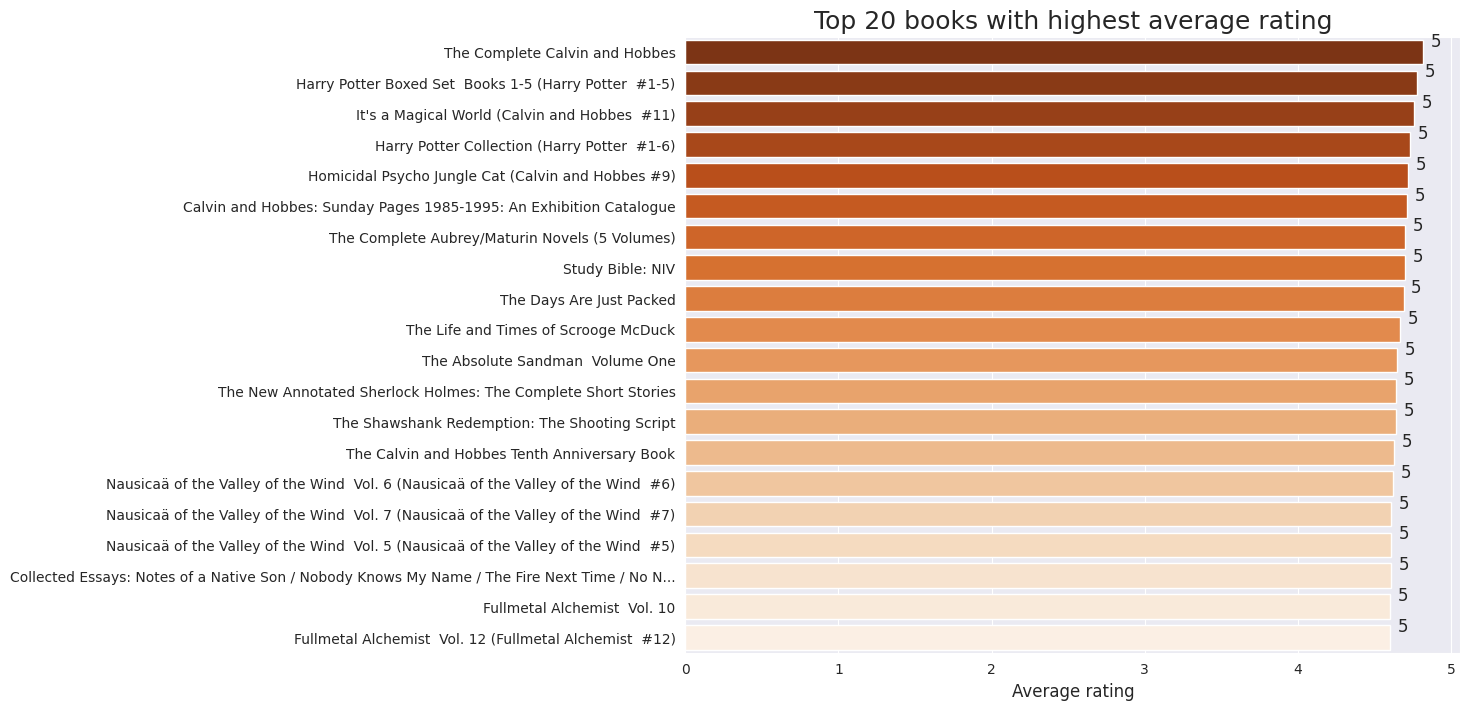

In [15]:
#построим диаграмму
#для начала сократим количество символом в названии тайтла
top_rating.index = [i[:90] + '...' if len(i) > 100 else i for i in top_rating.index]

colors = sns.color_palette('Oranges_r', n_colors=len(top_rating))
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(y = top_rating.index, x = top_rating['average_rating'], ax=ax, palette = colors)

ax.set_xlabel("Average rating", fontsize=12)
ax.set_ylabel("")
ax.set_title("Top 20 books with highest average rating",fontsize=18)

for i in ax.patches:
    ax.text(i.get_width()+.05, i.get_y()+.2,str(round(i.get_width())), fontsize=12)

##Посмотрим на самые низко оценненные книги

In [16]:
bottom_rating = df[df['ratings_count'] > 1000]
bottom_rating = bottom_rating.sort_values('average_rating').head(10).set_index('title')

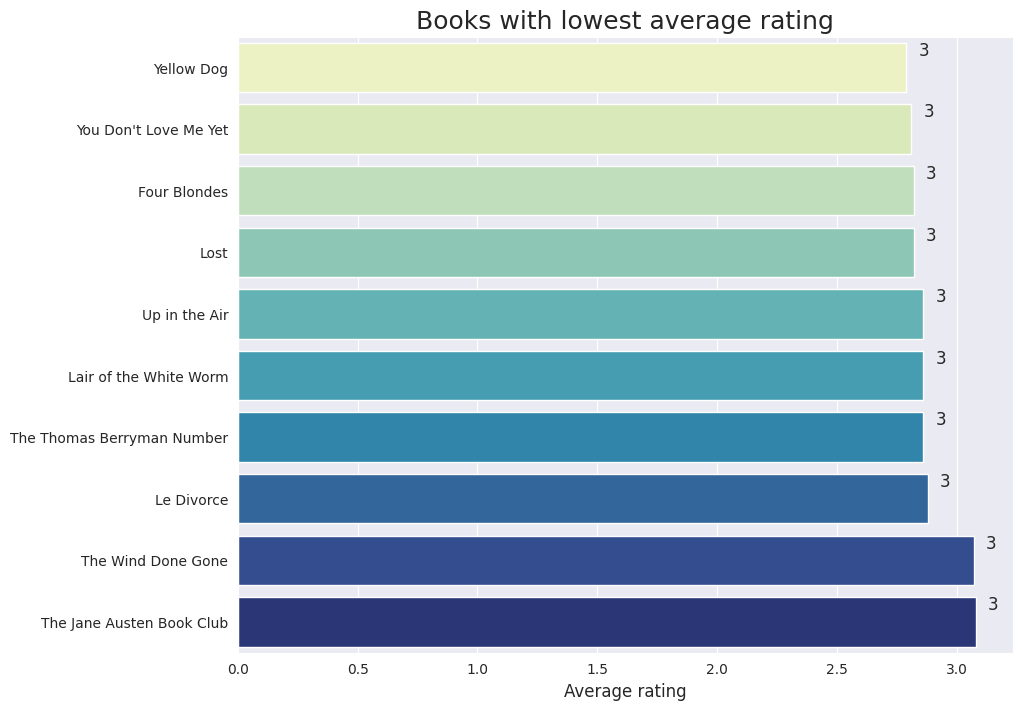

In [17]:
bottom_rating.index = [i[:100] + '...' if len(i) > 100 else i for i in bottom_rating.index]

colors = sns.color_palette('YlGnBu', n_colors=len(bottom_rating))
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(y = bottom_rating.index, x = bottom_rating['average_rating'], ax=ax, palette = colors)

ax.set_xlabel("Average rating", fontsize=12)
ax.set_ylabel("")
ax.set_title("Books with lowest average rating",fontsize=18)

for i in ax.patches:
    ax.text(i.get_width()+.05, i.get_y()+.2,str(round(i.get_width())), fontsize=12)

##Книги каких авторов оценивали выше всего?

In [18]:
#посчитаем количество тайтлов со средней оценкой больше 4.5 по авторам
top_authors=df[df['average_rating']>4.5]
top_authors=top_authors.groupby('authors')['title'].count().sort_values(ascending = False).head(10)
top_authors

authors
Hiromu Arakawa/Akira Watanabe                                                 11
Bill Watterson                                                                 7
Jane Austen                                                                    4
J.R.R. Tolkien                                                                 4
J.K. Rowling                                                                   4
J.K. Rowling/Mary GrandPré                                                     3
Cook's Illustrated Magazine                                                    3
Hayao Miyazaki/Matt Thorn/Kaori Inoue/Joe Yamazaki/Walden Wong/Izumi Evers     3
Arthur Conan Doyle/Leslie S. Klinger                                           2
Christina Scull/Wayne G. Hammond                                               2
Name: title, dtype: int64

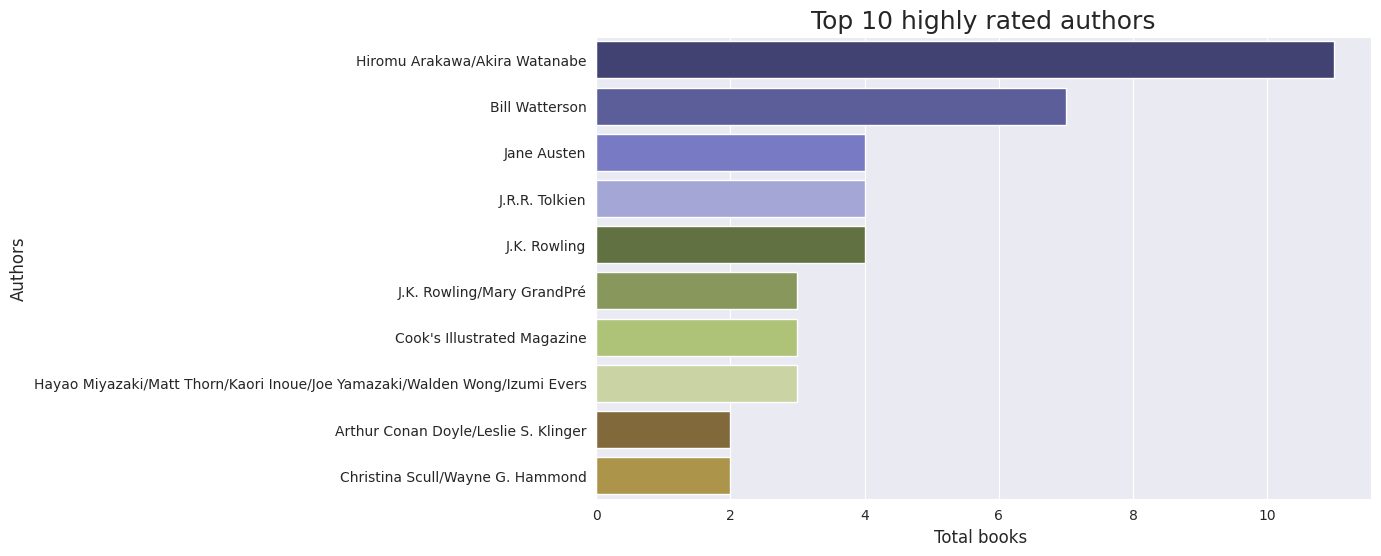

In [19]:
#построим диаграмму
colors = sns.color_palette('tab20b', n_colors=len(top_authors))
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(y = top_authors.index, x = top_authors, ax=ax, palette = colors)

ax.set_xlabel("Total books ", fontsize=12)
ax.set_ylabel("Authors", fontsize=12)
ax.set_title("Top 10 highly rated authors",fontsize=18)

plt.show()

Как мы видим больше всего книг с высоким средним рейтингом написаны Хирому Аракава и Акирой Ватанабе - авторами великолепной манги Стальной алхимик. Следом за ними - Билл Уотерсон, автор комиксов про «Кельвина и Хоббса» - шестилетнего мальчика Кальвина и его плюшевого тигра Хоббса. Следом идут Джейн Остин, Джон Толкиен и Джоан Роулинг.

#Построим предсказательную модель

Наша цель - разработать модель для прогнозирования рейтингов книг. Для этого мы будем использовать модель линейной регрессии с целевой переменной - average_ratings и независимыми переменными num_pages, authors, rating_count и другими.

## Для начала очистим датасет от выбросов
Для наглядности построим боксплоты.

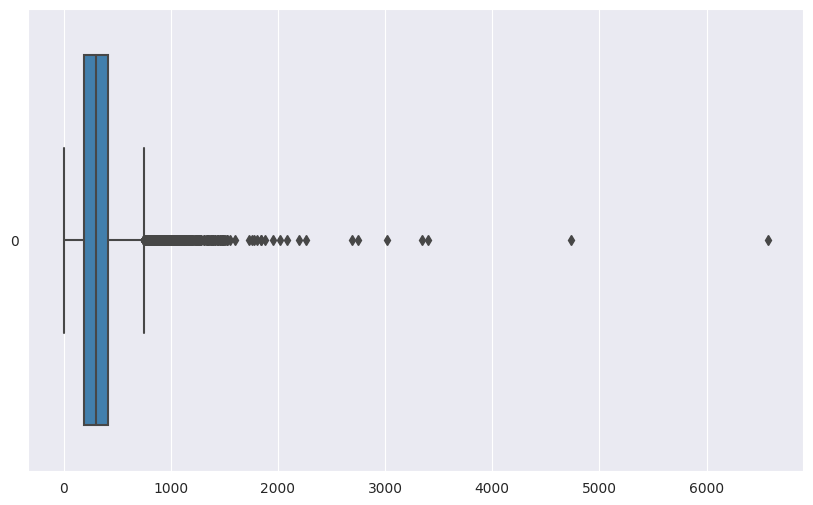

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(df['num_pages'], orient='horizontal')
plt.show()

Мы видим большое количество выбросов в правую сторону от значения 1000

In [21]:
df.shape[0]

8908

In [34]:
#создадим фукнцию для удаления выбросов
def cleaner (x, y):
  inqr=x.quantile(0.75) - x.quantile(0.25)
  top=x.quantile(0.75) + 1.5*inqr
  bottom=x.quantile(0.25) - 1.5*inqr
  y=y[(x < top)&(x > bottom)]
  return y

#num_pages
df=cleaner(df['num_pages'], df)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,co-authors
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,1
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic,0
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,1
9,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,eng,215,4930,460,8/3/2004,Crown,0
10,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams/Stephen Fry,4.22,eng,6,1266,253,3/23/2005,Random House Audio,1
...,...,...,...,...,...,...,...,...,...,...
11103,Fantastic Mr. Fox (Cover to Cover),Roald Dahl,4.05,eng,90,7,0,9/15/1995,BBC Audiobooks,0
11118,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,512,156,20,12/21/2004,Da Capo Press,2
11119,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783,56,12/1/1988,Penguin Books,0
11120,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,415,820,95,8/1/1993,Penguin Books,0


<Axes: xlabel='ratings_count'>

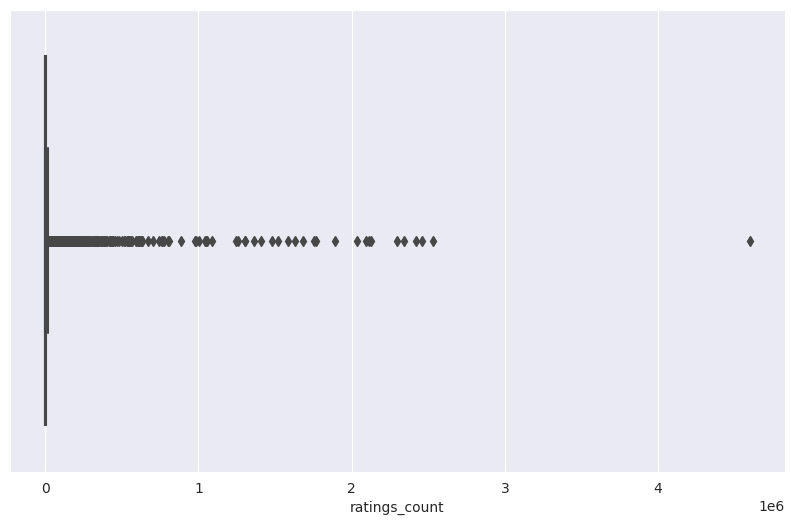

In [65]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['ratings_count'])

In [35]:
df=cleaner(df['ratings_count'], df)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,co-authors
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic,0
9,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,eng,215,4930,460,8/3/2004,Crown,0
10,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams/Stephen Fry,4.22,eng,6,1266,253,3/23/2005,Random House Audio,1
13,Bill Bryson's African Diary,Bill Bryson,3.44,eng,55,7270,499,12/3/2002,Broadway Books,0
14,Bryson's Dictionary of Troublesome Words: A Wr...,Bill Bryson,3.87,eng,256,2088,131,9/14/2004,Broadway Books,0
...,...,...,...,...,...,...,...,...,...,...
11103,Fantastic Mr. Fox (Cover to Cover),Roald Dahl,4.05,eng,90,7,0,9/15/1995,BBC Audiobooks,0
11118,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,512,156,20,12/21/2004,Da Capo Press,2
11119,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783,56,12/1/1988,Penguin Books,0
11120,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,415,820,95,8/1/1993,Penguin Books,0


<Axes: xlabel='text_reviews_count'>

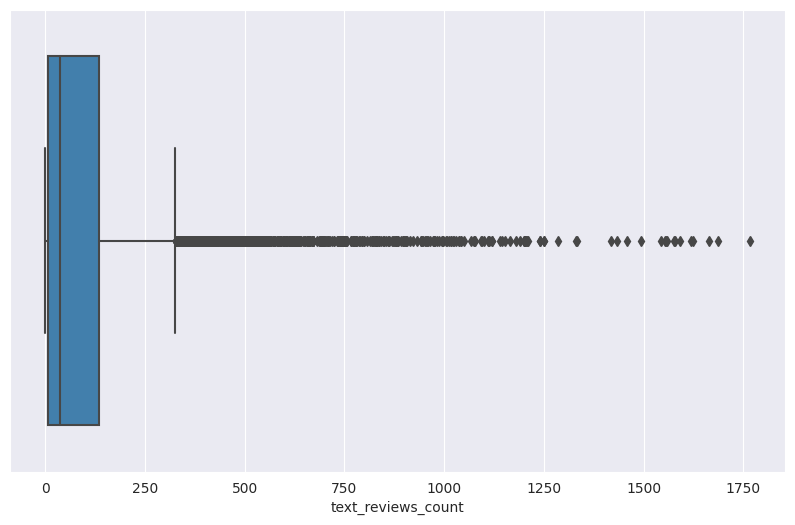

In [67]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['text_reviews_count'])

In [36]:
df=cleaner(df['text_reviews_count'], df)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,co-authors
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic,0
10,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams/Stephen Fry,4.22,eng,6,1266,253,3/23/2005,Random House Audio,1
14,Bryson's Dictionary of Troublesome Words: A Wr...,Bill Bryson,3.87,eng,256,2088,131,9/14/2004,Broadway Books,0
26,The Lord of the Rings: Complete Visual Companion,Jude Fisher,4.50,eng,224,359,6,11/15/2004,Houghton Mifflin Harcourt,0
27,Agile Web Development with Rails: A Pragmatic ...,Dave Thomas/David Heinemeier Hansson/Leon Bree...,3.84,eng,558,1430,59,7/28/2005,Pragmatic Bookshelf,5
...,...,...,...,...,...,...,...,...,...,...
11103,Fantastic Mr. Fox (Cover to Cover),Roald Dahl,4.05,eng,90,7,0,9/15/1995,BBC Audiobooks,0
11118,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,512,156,20,12/21/2004,Da Capo Press,2
11119,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783,56,12/1/1988,Penguin Books,0
11120,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,415,820,95,8/1/1993,Penguin Books,0


<Axes: xlabel='average_rating'>

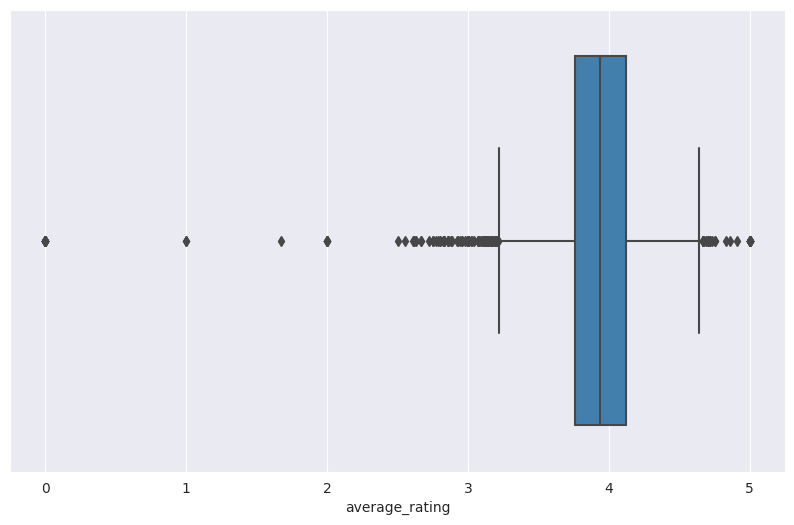

In [69]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['average_rating'])

In [37]:
#удалим также выбросы в average rating
df=cleaner(df['average_rating'], df)
df

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,co-authors
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic,0
10,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams/Stephen Fry,4.22,eng,6,1266,253,3/23/2005,Random House Audio,1
14,Bryson's Dictionary of Troublesome Words: A Wr...,Bill Bryson,3.87,eng,256,2088,131,9/14/2004,Broadway Books,0
26,The Lord of the Rings: Complete Visual Companion,Jude Fisher,4.50,eng,224,359,6,11/15/2004,Houghton Mifflin Harcourt,0
27,Agile Web Development with Rails: A Pragmatic ...,Dave Thomas/David Heinemeier Hansson/Leon Bree...,3.84,eng,558,1430,59,7/28/2005,Pragmatic Bookshelf,5
...,...,...,...,...,...,...,...,...,...,...
11103,Fantastic Mr. Fox (Cover to Cover),Roald Dahl,4.05,eng,90,7,0,9/15/1995,BBC Audiobooks,0
11118,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,512,156,20,12/21/2004,Da Capo Press,2
11119,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783,56,12/1/1988,Penguin Books,0
11120,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,415,820,95,8/1/1993,Penguin Books,0


##Преобразование данных
Преобразуем наше категориальные переменные в числовые - это одно из условий успешной работы предсказательной модели


In [39]:
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [40]:
Le = preprocessing.LabelEncoder()
#кодируем названия и переприсваиваем их в столбец title
df['title'] = Le.fit_transform(df['title'])
#авторов
df['authors'] = Le.fit_transform(df['authors'])
#издательства
df['publisher'] = Le.fit_transform(df['publisher'])

<ipython-input-40-37bc3ede0bfd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title'] = Le.fit_transform(df['title'])
<ipython-input-40-37bc3ede0bfd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['authors'] = Le.fit_transform(df['authors'])
<ipython-input-40-37bc3ede0bfd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [41]:
#выделим год в отдельную колонку
df['year'] = df['publication_date'].str.split('/', expand = True)[2]

<ipython-input-41-6c40928b5474>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['publication_date'].str.split('/', expand = True)[2]


##Построение модели линейной регрессии

Определим целевую и независимые переменные (y и x)


In [42]:
X = df.drop(['average_rating', 'language_code', 'publication_date'], axis = 1)
y = df['average_rating']

In [43]:
X

,title,authors,num_pages,ratings_count,text_reviews_count,publisher,co-authors,year
2,1667,1709,352,6333,244,1203,0,2003
10,4377,953,6,1266,253,1128,1,2005
14,680,381,256,2088,131,231,0,2004
26,4550,2192,224,359,6,687,0,2004
27,260,772,558,1430,59,1096,5,2005
...,...,...,...,...,...,...,...,...
11103,1335,3418,90,7,0,120,0,1995
11118,1305,4282,512,156,20,355,2,2004
11119,5809,4281,635,783,56,1026,0,1988
11120,4399,4281,415,820,95,1026,0,1993


Поделим наш датасет на обучающую выборку с долей - 75% и на тестовую - 25% (на которой мы будем проверять эффективность предсказательной модели)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

Тренируем модель

In [45]:
Lr = LinearRegression()
Lr.fit(X_train, y_train)

LinearRegression()

Предсказываем средний рейтинг

In [46]:
predictions = Lr.predict(X_test)

<Axes: >

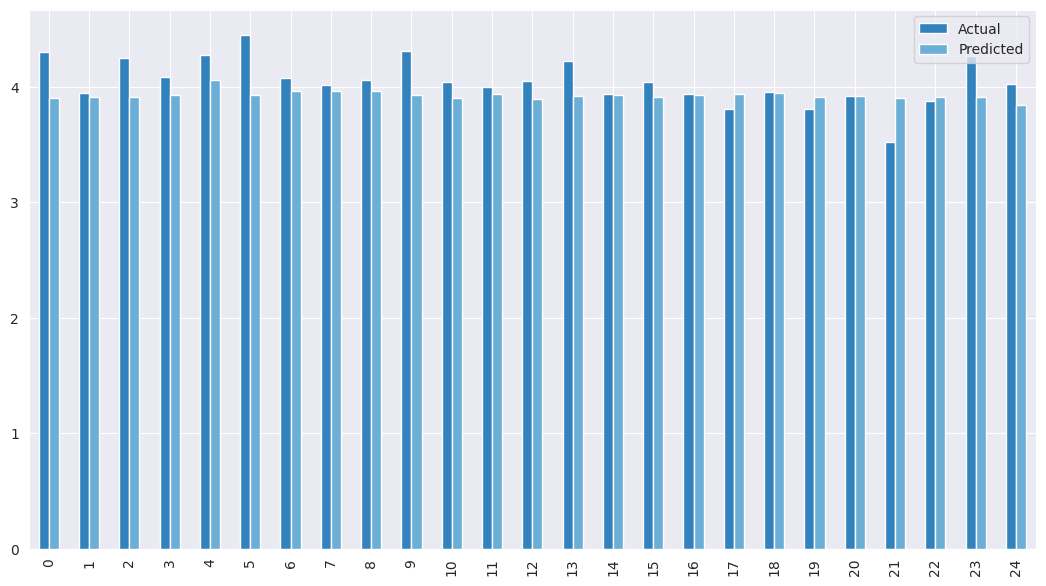

In [47]:
#визуализируем сравнения реальным и предсказанных значений
compare = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': predictions.tolist()}).head(25)
compare.plot(kind='bar', figsize=(13, 7))

In [48]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print("R2 score:", r2_score(y_test, predictions))

MAE: 0.20740956976169486
MSE: 0.06687359283448456
R2 score: 0.03071712756134659


In [36]:
df['average_rating'].describe()

count    8148.000000
mean        3.924392
std         0.364877
min         0.000000
25%         3.770000
50%         3.950000
75%         4.130000
max         5.000000
Name: average_rating, dtype: float64

##Результаты
Несмотря на небольшое значение коэффициента детерминации. Мы получили малые значения метрик MAE и MSE, что означет что мы создали довольно хорошую модель для предсказаний среднего рейтинга книги. Тем не менее следует признать, что модель не очень хорошо объясняет изменчивость зависимой переменной с помощью использованных предикторов. Возможным решением будет анализ остатков. Следует проверить нет ли систематических ошибок или паттернов, которые модель не учла. Если таковые обнаружатся, это может указывать на потенциальные области улучшения модели. Также, следует, возможно, обратиться к другим алгоритмам, таким как случайный лес, градиентный бустинг или нейронные сети, чтобы определить, какой из них может дать лучшие результаты